This tutorial describes how to use 
- the pyDOE library to build a Design of Experiments
- the Gaussian Process based on the scikit-learn toolbox 
[Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011]


<div class="alert alert-warning fade in" id="d107"><h4 id="this-is-an-example-alert-message-">**Four main steps**</h4>
<hr>
<ol>
<li>We have to create the training points by using a design of experiments.</li>
<li>Then, we create an object of the class Gaussian Process Regressor (with some options)</li>
<li>To finish, we do the GP models by applying the *'fit'* function</li>
  <li>  To apply your GP model with the *'predict'* function
</ol>
</div>

# A Quick overview in 1D with sin(x) function

In [68]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

## a 1D noiseless case

In [69]:
# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

In [70]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [71]:
# Instanciate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

<IPython.core.display.Javascript object>


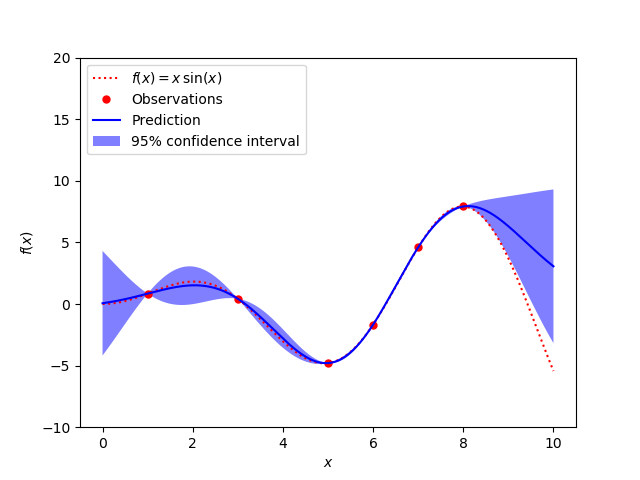

In [72]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

## a 1D noisy case

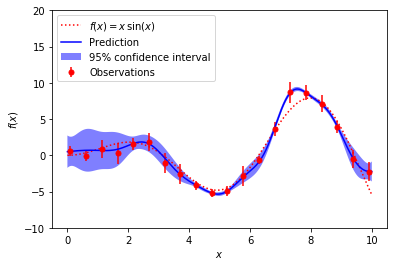

In [33]:
# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

<div class="alert alert-info fade in" id="d110">
<p>For more complex systems, we use a design of experiments</p>
 <ol> - create a DOE wiyh PyDOE toolbox </ol>
  <ol>  - download a database (DOE files) </ol>


</div>


# 2. Installation of pyDOE

The package pyDOE which handles the creation of the domain of experiment.

In [34]:
pip install pYDOE


The following command must be run outside of the IPython shell:

    $ pip install pYDOE

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


# 3. Construction of the training points for a 2D example

## 3.1 Case 1: the user doesn't have any sample

In this case, the sample of points can be created thanks to the function called 'map_2d_space'(see its documentation for more information in the module 'functions') which divides regularly the domain of inputs x.  


[[-1.         -1.        ]
 [-1.         -0.66666667]
 [-1.         -0.33333333]
 [-1.          0.        ]
 [-1.          0.33333333]
 [-1.          0.66666667]
 [-1.          1.        ]
 [-0.66666667 -1.        ]
 [-0.66666667 -0.66666667]
 [-0.66666667 -0.33333333]
 [-0.66666667  0.        ]
 [-0.66666667  0.33333333]
 [-0.66666667  0.66666667]
 [-0.66666667  1.        ]
 [-0.33333333 -1.        ]
 [-0.33333333 -0.66666667]
 [-0.33333333 -0.33333333]
 [-0.33333333  0.        ]
 [-0.33333333  0.33333333]
 [-0.33333333  0.66666667]
 [-0.33333333  1.        ]
 [ 0.         -1.        ]
 [ 0.         -0.66666667]
 [ 0.         -0.33333333]
 [ 0.          0.        ]
 [ 0.          0.33333333]
 [ 0.          0.66666667]
 [ 0.          1.        ]
 [ 0.33333333 -1.        ]
 [ 0.33333333 -0.66666667]
 [ 0.33333333 -0.33333333]
 [ 0.33333333  0.        ]
 [ 0.33333333  0.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  1.        ]
 [ 0.66666667 -1.        ]
 [ 0.66666667 -0.66666667]
 

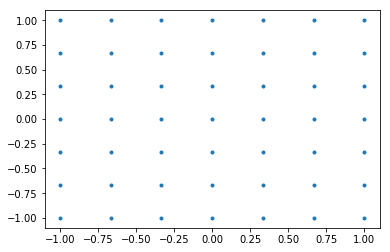

In [35]:
from pyDOE import *

import numpy as np
import matplotlib.pyplot as plt

# construction of both test and training points (the user doesn't have any validation point)
x_min=[-1 , -1]
x_max=[1 , 1] 
num=7
# grid pattern
x_array = np.linspace(x_min[1], x_max[1], num)
y_array = np.linspace(x_min[1], x_max[1], num)

mapping_array = []

for i in range(len(x_array)):
    for j in range(len(y_array)):
        mapping_array.append([x_array[i], y_array[j]])
x_train_and_test=np.array(mapping_array);

print(x_train_and_test)
plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
plt.show()

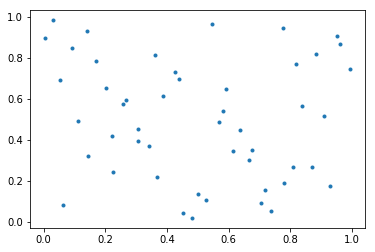

In [36]:
from pyDOE import *

dim = 2 # dimension of the problem
#DOE with classical LHS
x_train_and_test = lhs(dim, samples=49)
#print(x_train_and_test)
plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
plt.show()

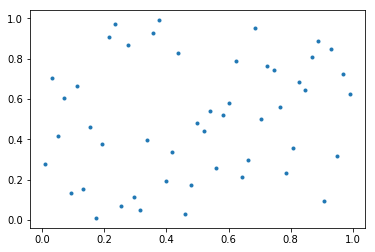

In [37]:
#DOE with classical LHS
x_train_and_test = lhs(dim, samples=49, criterion='center')
#print(x_train_and_test)
plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
plt.show()

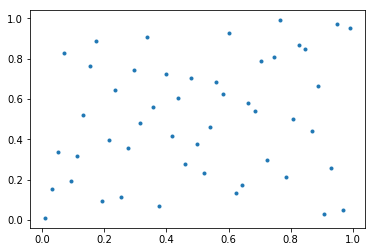

In [38]:
#DOE with classical LHS
x_train_and_test = lhs(dim, samples=49, criterion='centermaximin')
#print(x_train_and_test)
plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
plt.show()

The outputs y are created by applying the function we want to model.  
These samples of points will be passed in the function 'fit' which take 10% of them to make the validation points.

## 3.2 Define the Branin function and visualize it

In [39]:
def branin(x):
    """
    This function is the Branin function
    Input:
    --------
    x : 2D array_like
    Output
    --------
    y : array_like
    values of Branin function for each x
    """
    if x.shape[1] != 2:
        raise UncorrectInputDimension()

    x1 = 15 * x[:, 0] - 5
    x2 = 15 * x[:, 1]
    return (x2 - 5.1 / (4. * (np.pi)**2) * x1**2 + 5. / np.pi * x1 - 6)**2 + \
        10. * (1. - 1. / (8. * np.pi)) * np.cos(x1) + 10


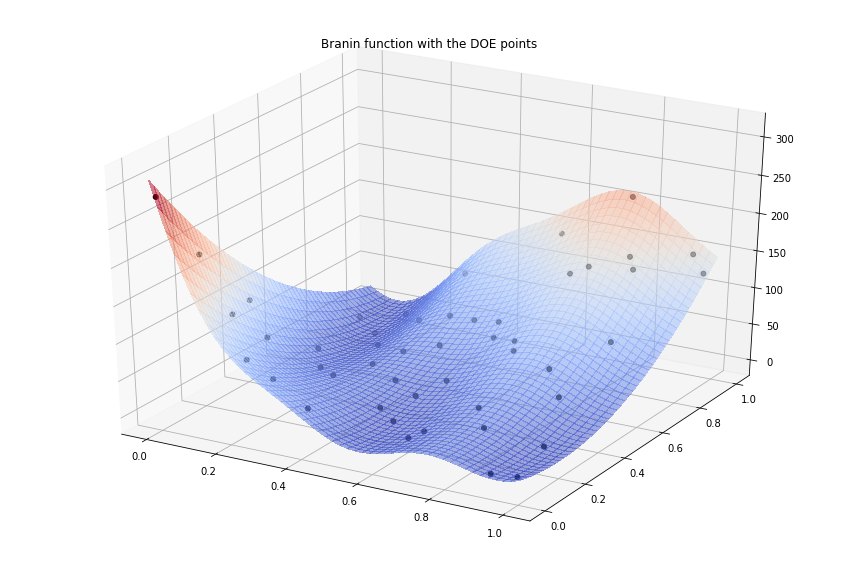

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

y_train_and_test = branin(x_train_and_test) # branin's function = function to model
x = np.linspace(0,1,50)
res = []
for x0 in x:
    for x1 in x:
        res.append(branin(np.array([[x0,x1]])))
res = np.array(res)
res = res.reshape((50,50)).T
X,Y = np.meshgrid(x,x)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.scatter(x_train_and_test[:,0],x_train_and_test[:,1],y_train_and_test,zdir='z',marker = '.',c='k',s=100)
surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)
plt.title('Branin function with the DOE points')

plt.show()

## 3.3 Case 2: the user do have sample of points

If the user has a file with points, he can also use the function 'construct_sample' to construct the samples : 

In [41]:
import pandas as pd

file_name = "BRANIN_Train.csv"
xy_train = pd.read_csv(file_name, header=None)
x_train = np.array(xy_train[[0,1]])
y_train = np.array(xy_train[2])
print(x_train[:,0])
print(y_train)

file_name = "BRANIN_Valid.csv"
xy_valid = pd.read_csv(file_name, header=None)
x_valid = np.array(xy_valid[[0,1]])
y_valid = np.array(xy_valid[2])
#print(x_valid)
#print(y_valid)

file_name = "BRANIN_Predict.csv"
xy_to_predict = pd.read_csv(file_name, header=None)
x_to_predict = np.array(xy_to_predict[[0,1]]) #we have only x in this case
#print(x_to_predict)


[0.09552949 0.83179357 0.74168267 0.17256091 0.03604282 0.74860049
 0.49934044 0.49208665 0.93461467 0.8807172  0.4336003  0.81867117
 0.72770336 0.04544719 0.70779226 0.54776238 0.63106205 0.30271909
 0.47501677 0.51989657 0.78904871 0.50032716 0.28300669 0.451041
 0.65817493 0.26837223 0.45659908 0.58942116 0.11127528 0.05809894
 0.011737   0.44648431 0.44126461 0.42039259 0.61827297 0.30944503
 0.38187072 0.9175683  0.96747286 0.21934246 0.27182861 0.35327685
 0.08920059 0.71064778 0.64731831 0.19494702 0.48465117 0.67296317
 0.86896429 0.55714943 0.20217391 0.13707021 0.19790894 0.92422119
 0.95084619 0.79732368 0.10800572 0.8591487  0.36760716 0.62474648
 0.76837823 0.99871062 0.77007737 0.46833664 0.39828836 0.95996673
 0.38567848 0.94129091 0.02761556 0.6665888  0.87661168 0.8851333
 0.25515471 0.47343552 0.43829043 0.32451046 0.82004619 0.40671456
 0.18203326 0.94699463 0.55139186 0.96035225 0.5098787  0.01970767
 0.68727324 0.1157061  0.24997308 0.54434092 0.4864107  0.5380911

NB: the form of the csv file is very specific. Open one to see how the data is filled in.  
Every point is in the first column. One row corresponds to one point. Each component of the point is seperated by a comma without space.

We have so far constructed the training points and the validation points (if the user have them, if not the 'fit' function will do it with the training points).

# 4. Building a Gaussian process 

<p class="alert alert-warning" style="padding:1em">**Reference** : Carl Eduard Rasmussen and Christopher K.I. Williams, “Gaussian Processes for Machine Learning”, 
MIT Press 2006, Link to an official complete PDF version of the book here: http://www.gaussianprocess.org/gpml/chapters/RW.pdf. </p>

In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_squared_error

## 4.1 Create the object GP Regressor

To create an object, the user just have to do define :
- the dimension of the data if you want to have anisotropic kernel
- the choice of the kernel (or the composition of different kernels)
- the choice of the optimizer for the hyperparameters (if =None, no optimization is done)
- the choice of the number of restarts for the optimization (to avoid local minima)

In [51]:
# Kriging surrogate model with a RBF kernel (also called “squared exponential” kernel) which is a  infinitely differentiable
kernel = ConstantKernel(10, (1e-3, 1e5)) * RBF(10, (1e-3, 1e3))
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=20)


## 4.2 Choice of the kernels

<div class="alert alert-info fade in" >
**The kernel specifies the covariance function of the GP.**
<p>You can combine also different kernels:</p>
 <ol> - Common kernels are provided (Constant, RBF or Squared exponentiel, Matern,...),  </ol>
  <ol>  - but it is also possible to specify custom kernels (sum, products, ...) . </ol>
  
If None is passed, the kernel “1.0 * RBF(1.0)” is used as default. Note that the kernel’s hyperparameters are optimized during fitting.
More details are given in http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels
</div>



In [52]:
from sklearn.gaussian_process.kernels import (WhiteKernel, RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

## 4.3 Produce the GPR models

To produce the GPR model, the user use the 'fit' function .    
The user needs to have : 
- x : the training inputs (previously built)
- y : the training outputs (previously built)


In [53]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gpr.fit(x_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=3.16**2 * RBF(length_scale=10),
             n_restarts_optimizer=20, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [54]:
#kernel parameters
print(" Learned Kernel with optimized parameters:%s" % gpr.kernel_)
#Value of theta
print('Parameters values', np.exp(gpr.kernel_.theta)) 


 Learned Kernel with optimized parameters:196**2 * RBF(length_scale=0.26)
Parameters values [3.85906990e+04 2.60360274e-01]


<div class="alert alert-info fade in" >
**Isotropic or Anisotropic:**
<p>The RBF kernel is parameterized by a length-scale parameter length_scale>0,</p>
 <ol> -which can either be a scalar (isotropic variant of the kernel) </ol>
     <ol> -or a vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel). </ol>
 In that case, the dimension of the initial parameter has to be specified 

In [58]:
dim=2
kernel = ConstantKernel(10, (1e-3, 1e5)) * RBF([10]*dim, (1e-3, 1e3))
#kernel = ConstantKernel(1.0, (1e-3, 1e3)) + 1.0 * Matern(length_scale=[1.0]*dim, length_scale_bounds=(1e-1, 10.0),nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=20)
gpr.fit(x_train, y_train)
#kernel parameters
print(" Learned Kernel with optimized parameters:%s" % gpr.kernel_)
#Value of theta
print('Parameters values', np.exp(gpr.kernel_.theta)) 


 Learned Kernel with optimized parameters:96.8**2 * RBF(length_scale=[0.147, 0.557])
Parameters values [9.37680838e+03 1.46665283e-01 5.57069300e-01]


In [59]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gpr.predict(x_valid, return_std=True)

D:\bartoli\Anaconda2\envs\mypython35\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [60]:
y_pred, sigma

(array([ 27.41385809, 124.08728546,  89.53321806,  10.87828588,
         44.93288481,  64.83030802,  15.71221025,  28.68129075,
         41.14887348, 119.27956238, 139.66109467,  61.78321497,
         21.2648509 ,  26.18232775,  24.02363265,  71.96904336,
         60.83828378,  60.93614927,  13.71284533,  96.71337926,
        116.41116804,   8.89405864,  25.2320036 ,  20.5449487 ,
          1.23755503,  12.66987899,  36.07429805,  75.37125601,
         27.17042518,  69.84094039,   7.35548708,  41.12480865,
          4.29859084,  19.21596849, 169.27373712, 140.57466551,
         67.68698752,  17.69097471,   9.08636613,   2.09971055]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 13.22566444,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 13.6121797 ,  0.        ,  0.   

# 5. Exploiting the results

## 5.1 Computation of error metrics

We compute several types of error,  
- the  mean square error
\begin{equation}
\text{MSE} = \sum\limits_{i=1}^{n_\text{test}}\left(y\left(\textbf{x}_{\text{test},i}\right)-\hat{y}\left(\textbf{x}_{\text{test},i}\right)\right)^2
\end{equation}  
- the relative error (RE in %) 
\begin{equation}
\text{RE} = \frac{\sqrt{\sum\limits_{i=1}^{n_\text{test}}\left(y\left(\textbf{x}_{\text{test},i}\right)-\hat{y}\left(\textbf{x}_{\text{test},i}\right)\right)^2}}{\sqrt{\sum\limits_{i=1}^{n_{\text{test}}}\left(y\left(\textbf{x}_{\text{test},i}\right)\right)^2}}100,
\end{equation}  
-  the Coefficient of variation or Coefficient of correlation (R2)
\begin{equation}
\text{R2} = 1- \frac{{\sum\limits_{i=1}^{n_\text{test}}\left(y\left(\textbf{x}_{\text{test},i}\right)-\hat{y}\left(\textbf{x}_{\text{test},i}\right)\right)^2}}{\sqrt{\sum\limits_{i=1}^{n_{\text{test}}}\left(y\left(\textbf{x}_{\text{test},i}  \right)- \bar y \right)^2}},
\end{equation}  
where  ${\displaystyle {\bar {y}}}$  is the mean of the observed data:
$${\bar {y}}=\frac {1}{n_{\text{test}}}\sum _{i=1}^{n_{\text{test}}}\hat{y}\left(\textbf{x}_{\text{test},i}\right)$$
An R2 of 1 indicates that the regression line perfectly fits the data.



More metrics computed in scikit-learn are given in http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


In [64]:
from sklearn.metrics import mean_squared_error, r2_score


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_valid, y_pred))


Mean squared error: 0.00
Variance score: 1.00


## 5.2 Visualization

To see the error more visually, the user can compare the y_valid with the predicted values by the method predict_output of MoE.

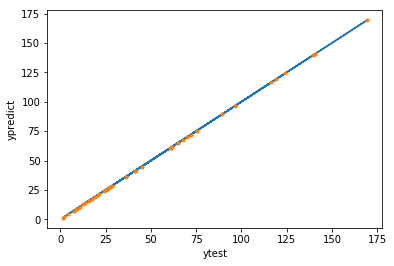

In [62]:
plt.figure()
plt.plot(y_valid,y_valid)
plt.plot(y_valid,y_pred,'.')
plt.xlabel('ytest')
plt.ylabel('ypredict')
plt.show()

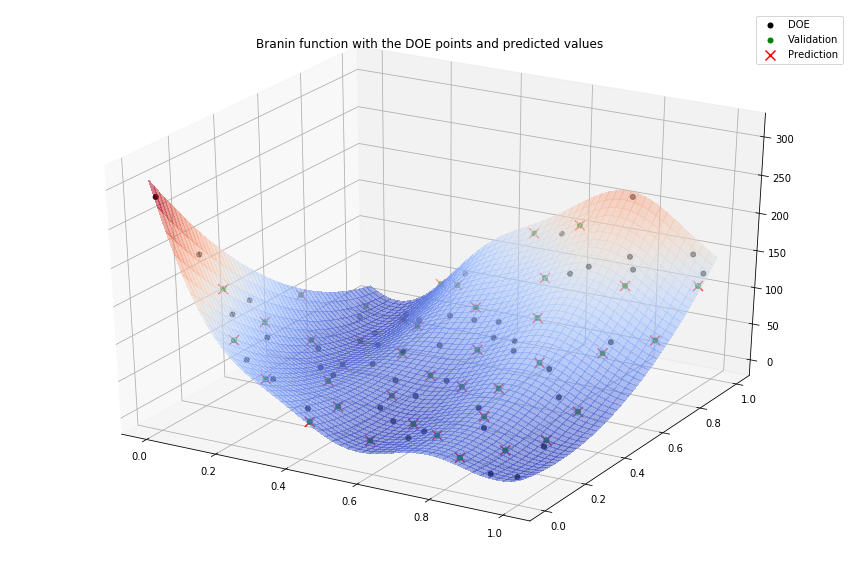

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

y_train_and_test = branin(x_train_and_test) # branin's function = function to model
x = np.linspace(0,1,50)
res = []
for x0 in x:
    for x1 in x:
        res.append(branin(np.array([[x0,x1]])))
res = np.array(res)
res = res.reshape((50,50)).T
X,Y = np.meshgrid(x,x)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.scatter(x_train_and_test[:,0],x_train_and_test[:,1],y_train_and_test,zdir='z',marker = '.',c='k',s=100, label='DOE')
surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)
ax.scatter(x_valid[:,0],x_valid[:,1],y_valid,zdir='z',marker = '.',c='g', s=100, label='Validation')
ax.scatter(x_valid[:,0],x_valid[:,1],y_pred,zdir='z',marker = 'x',c='r', s=100, label= 'Prediction')
plt.legend()
plt.title('Branin function with the DOE points and predicted values')

plt.show()

With the visualization of the estimation error

D:\bartoli\Anaconda2\envs\mypython35\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


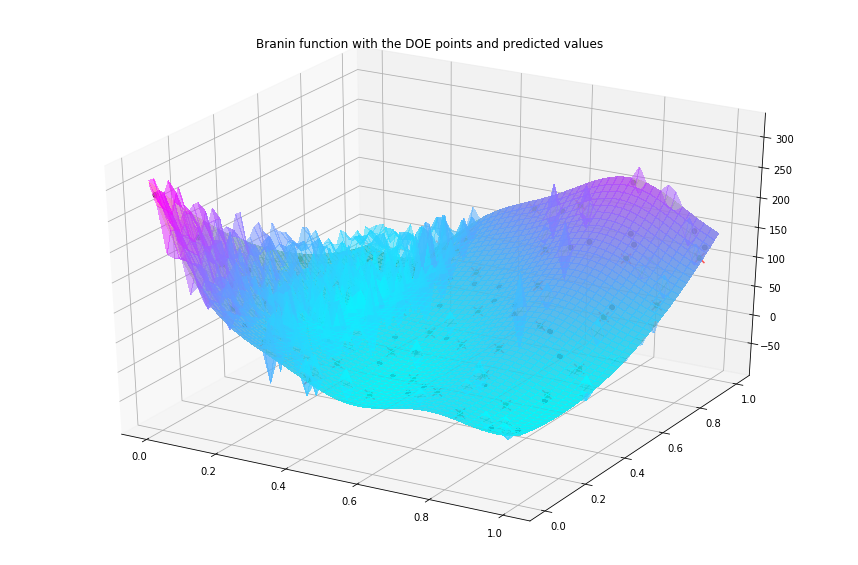

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

y_train_and_test = branin(x_train_and_test) # branin's function = function to model

x = np.linspace(0,1,50)
res = []
res_y_pred= []
res_sigma_pred = []
for x0 in x:
    for x1 in x:
        res.append(branin(np.array([[x0,x1]])))
        y , s = gpr.predict(np.array([[x0,x1]]), return_std=True)
        res_y_pred.append(y)
        res_sigma_pred.append(s)
res = np.array(res)
res = res.reshape((50,50)).T
res_y_pred = np.array(res_y_pred)
res_y_pred = res_y_pred.reshape((50,50)).T
res_sigma_pred = np.array(res_sigma_pred)
res_sigma_pred = res_sigma_pred.reshape((50,50)).T

X,Y = np.meshgrid(x,x)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.scatter(x_train_and_test[:,0],x_train_and_test[:,1],y_train_and_test,zdir='z',marker = '.',c='k',s=100, label='DOE')
#surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False,alpha=0.5)
surf = ax.plot_surface(X, Y, res_y_pred, cmap=cm.summer,
                       linewidth=0, antialiased=False,alpha=0.5)

surf = ax.plot_surface(X, Y, res_y_pred - 3 * res_sigma_pred , cmap=cm.cool,
                       linewidth=0, antialiased=False,alpha=0.5, label='error')
surf = ax.plot_surface(X, Y, res_y_pred + 3 * res_sigma_pred , cmap=cm.cool,
                       linewidth=0, antialiased=False,alpha=0.5)

ax.scatter(x_valid[:,0],x_valid[:,1],y_valid,zdir='z',marker = '.',c='g', s=100, label='Validation')
ax.scatter(x_valid[:,0],x_valid[:,1],y_pred,zdir='z',marker = 'x',c='r', s=100, label='Prediction')
#plt.legend()
plt.title('Branin function with the DOE points and predicted values')

plt.show()

To use SMT models, please follow this link : https://github.com/SMTorg/SMT/blob/master/README.md